In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import *


ModuleNotFoundError: No module named 'pandas'

In [ ]:
global_stats = pd.read_csv("C:/Users/user/Desktop/Data Stuffs/Portfolio Projects/Global population analytics/world-data-2023.csv")
#print(global_stats.shape)
#print(global_stats.isnull().sum())

strings = ['Country', 'Abbreviation', 'Capital/Major City', 'Currency-Code', 'Largest city', 'Official language']

percents = ['Agricultural Land( %)', 'CPI Change (%)', 'Forested Area (%)', 'Population: Labor force participation (%)', 'Tax revenue (%)']

numerals_f = ['Density\n(P/Km2)', 'Co2-Emissions', 'CPI', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Out of pocket health expenditure',
              'Population', 'Total tax rate', 'Unemployment rate', 'Minimum wage', 'Latitude', 'Longitude']
numerals_i = ['Land Area(Km2)', 'Armed Forces size', 'Population', 'Urban_population']

all = ['Density\n(P/Km2)', 'Country', 'Abbreviation', 'Capital/Major City', 'Currency-Code', 'Largest city', 'Official language', 'Agricultural Land( %)', 'CPI Change (%)', 'Forested Area (%)', 'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Co2-Emissions', 'CPI', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Out of pocket health expenditure',
        'Population', 'Total tax rate', 'Unemployment rate', 'Minimum wage', 'Land Area(Km2)', 'Armed Forces size', 'Population', 'Urban_population']


#cleaning up data

for i in all:
    global_stats[i] = global_stats[i].fillna(0).astype(str)

for i in all:
    global_stats[i] = global_stats[i].str.replace(',', '')

for j in all:
    global_stats[j] = global_stats[j].str.replace('$', '')


for j in all:
    global_stats[j] = global_stats[j].str.replace('%', '')

for i in range(len(numerals_f)):
    if i < len(percents) - 1:
        global_stats[percents[i]] = global_stats[percents[i]].astype(float)
        global_stats[numerals_f[i]] = global_stats[numerals_f[i]].astype(float)
    else:
        global_stats[numerals_f[i]] = global_stats[numerals_f[i]].astype(float)

for i in numerals_i:
    global_stats[i] = global_stats[i].astype(int)

print(global_stats.describe())

       Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
count        195.000000             195.000000    1.950000e+02   
mean         356.764103              37.713333    6.860878e+05   
std         1982.888967              22.596702    1.917286e+06   
min            2.000000               0.000000    0.000000e+00   
25%           35.500000              19.800000    2.308300e+04   
50%           89.000000              39.200000    1.184840e+05   
75%          216.500000              54.850000    5.205440e+05   
max        26337.000000              82.600000    1.709824e+07   

       Armed Forces size  Birth Rate  Calling Code  Co2-Emissions  \
count       1.950000e+02  189.000000    194.000000   1.950000e+02   
mean        1.396718e+05   20.214974    360.546392   1.714167e+05   
std         3.601490e+05    9.945774    323.236419   8.241858e+05   
min         0.000000e+00    5.900000      1.000000   0.000000e+00   
25%         4.500000e+03   11.300000     82.500000   1.90150

           Country  Labor_pop_abs
36           China   9.504462e+08
77           India   6.736440e+08
186  United States   2.035085e+08
78       Indonesia   1.823876e+08
131       Pakistan   1.139134e+08
23          Brazil   1.358255e+08
126        Nigeria   1.063097e+08
13      Bangladesh   9.871339e+07
143         Russia   8.922284e+07
85           Japan   7.788179e+07


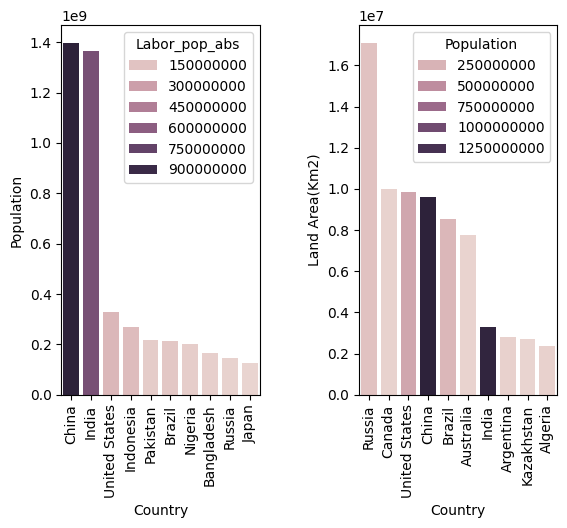

In [ ]:
#doing some basic visualizations
#1. Comparing populations and their corresponding labor populations, as well as land area for comparison?

plt.subplots_adjust(wspace = 0.5)
global_stats['Labor_pop_abs'] = global_stats['Population'] / 100 * global_stats['Population: Labor force participation (%)']
sorted_global_pop = global_stats.sort_values(by = 'Population', ascending = False).head(10)
plt.subplot(1,2,1)
pop1 = sns.barplot(data = sorted_global_pop, x = 'Country', y = 'Population', hue = 'Labor_pop_abs')
pop1.tick_params(axis = 'x', rotation = 90)

print(sorted_global_pop.loc[:,['Country','Labor_pop_abs']])

sorted_global_land = global_stats.sort_values(by = 'Land Area(Km2)', ascending = False).head(10)
plt.subplot(1,2,2)
pop2 = sns.barplot(data = sorted_global_land, x = 'Country', y = 'Land Area(Km2)', hue = 'Population')
pop2.tick_params(axis = 'x', rotation = 90)

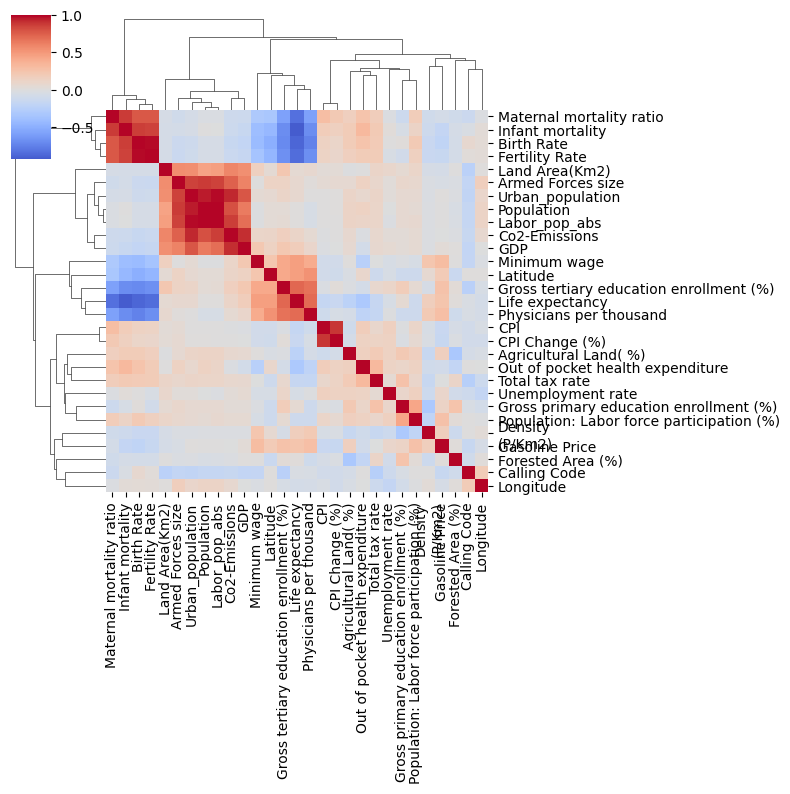

'\n1. birth rates and mortality rates seem to have some +ve correlation\n2. education and population has -ve correlation with mortality and birth rates\n3. forces size is +vely correlated with land area and population (+ urban), GDP as well and of course CO2 emissions\n4. more enrollment in tertiary education gives more GDP (albeit little), and minimum wage increase as well\n5. unemployment rate as well as primary education generally affects +vely across the board'

In [ ]:
#do correlation of each variable (numerical) in the dataset
correlation = global_stats.drop(columns = strings).select_dtypes(np.number).corr(method = 'pearson')
axis_correlation = sns.clustermap(correlation, cmap = 'coolwarm', center = 0, figsize= (8,8))
plt.show()

#some observations from the clustermap
'''
1. birth rates and mortality rates seem to have some +ve correlation
2. education and population has -ve correlation with mortality and birth rates
3. forces size is +vely correlated with land area and population (+ urban), GDP as well and of course CO2 emissions
4. more enrollment in tertiary education gives more GDP (albeit little), and minimum wage increase as well
5. unemployment rate as well as primary education generally affects +vely across the board'''

In [ ]:
#doing geospatial visualization of factors (visualization generally)
'''note the use of locationmode argument when using choropeth map mode in plotly'''
'''labor force and armed forces visualization i guess?'''
import plotly.express as px

geog = global_stats.dropna(axis = 0)
fig = px.scatter_geo(geog, lat = 'Latitude', lon = 'Longitude', hover_name = 'Country', color = 'Population')
fig.show()
fig2 = px.choropleth(geog, locations = 'Country', locationmode="country names", color="Population", projection='natural earth')
fig2.show()
fig3 = px.choropleth(geog, locations = 'Country', locationmode="country names", color="Labor_pop_abs", projection='natural earth')
fig3.show()

In [ ]:
#Predictive modeling - compare or predict GDP according to population related factors and education + land area?
ridgy = linear_model.Ridge()
linear = linear_model.LinearRegression()
lassy = linear_model.Lasso()
trees = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                  random_state =1)
rf = ensemble.RandomForestRegressor(n_estimators = 10, random_state = 20, oob_score = True)
numerals = global_stats.drop(columns = strings)
cols_x_y = ['Population','Land Area(Km2)']
cols_optimized = ['Population','Land Area(Km2)','Urban_population']
col_to_keep = ['Population: Labor force participation (%)', 'Land Area(Km2)', 'Armed Forces size', 'Population', 'Urban_population', 
                              'Minimum wage', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)',
                              'Unemployment rate']
X_y = numerals.drop(columns = [col for col in numerals.columns if col not in cols_x_y])
X = numerals.drop(columns = [col for col in numerals.columns if col not in cols_optimized])
y = numerals['GDP']
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, test_size = 0.2, random_state= 20)
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

#model fits
ridgyy = ridgy.fit(X_train, y_train)
rfy = rf.fit(X_train, y_train)
treey = trees.fit(X_train, y_train)
lassyy = lassy.fit(X_train, y_train)
lineary = linear.fit(X_train, y_train)

y_pred = rfy.predict(X_test)
scores = model_selection.cross_val_score(treey, X_scaled, y, cv = 5)
mse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(scores)

result = inspection.permutation_importance(treey, X_test_norm, y_test, n_repeats = 10, random_state = 1)

features = pd.DataFrame({'Feature_Name':[], 'Error_Mean':[], 'Error_std': []})

for i in range(len(result.importances_mean)):
    features.loc[len(features)] = [X.columns[i], result.importances_mean[i], result.importances_std[i]]

print(features.sort_values(by = 'Error_Mean', ascending = False))

#seems like gross primary education, population, land area and minimum wage affects the prediction of GDP


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.594e+25, tolerance: 4.206e+22
  model = cd_fast.enet_coordinate_descent(


[  0.15631393 -13.111366     0.15166144  -0.64776251   0.12410299]
       Feature_Name  Error_Mean  Error_std
2  Urban_population    0.191819   0.760254
0    Land Area(Km2)    0.035252   0.049884
1        Population   -0.001418   0.002836


44     2.464892e+11
187    5.604591e+10
97     5.207625e+10
169    7.030824e+11
120    1.330000e+08
           ...     
148    8.506550e+08
137    2.268481e+11
156    3.720625e+11
15     6.308046e+10
99     5.421932e+10
Name: GDP, Length: 156, dtype: float64


<Axes: ylabel='None'>

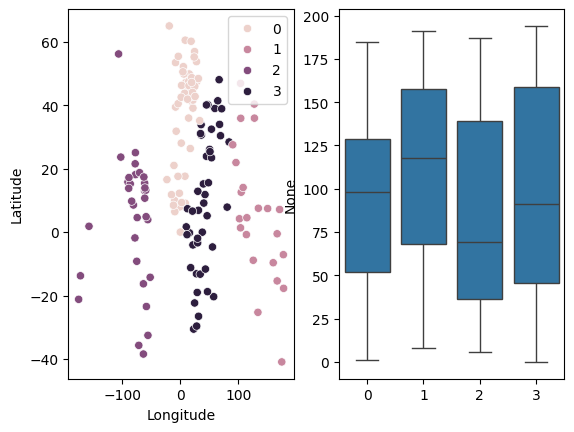

In [ ]:
#using clustering analysis to find out if a variable can successfully categorize your groups etc etc
'''Doing a basic geographic clustering analysis first?'''
all = ['Density\n(P/Km2)', 'Country', 'Abbreviation', 'Capital/Major City', 'Currency-Code', 'Largest city', 'Official language', 'Agricultural Land( %)', 'CPI Change (%)', 'Forested Area (%)', 'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Co2-Emissions', 'CPI', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Out of pocket health expenditure',
        'Population', 'Total tax rate', 'Unemployment rate', 'Minimum wage', 'Land Area(Km2)', 'Armed Forces size', 'Population', 'Urban_population']
clustering = global_stats.drop(columns = strings).fillna(0)
clustering_test = clustering.loc[:, ['Longitude', 'Latitude', 'GDP']]
X_train_clus, X_test_clus, y_train_clus, y_test_clus = model_selection.train_test_split(clustering_test.loc[:, ['Longitude', 'Latitude']], clustering_test['GDP'], test_size = 0.2, random_state= 20)
kmeans = cluster.KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(X_train_clus)
print(y_train_clus)

plt.subplot(1,2,1)
sns.scatterplot(data = X_train_clus, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

plt.subplot(1,2,2)
sns.boxplot(x = kmeans.labels_, y = y_train_clus.index)

In [ ]:
#continuing clustering analysis: maybe check Land Area + Labor Population with GDP?
